In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import loguniform
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

In [2]:
new_train_data = pd.read_csv('/kaggle/input/swm-data-final-split/new_data_final_train.csv')
new_valid_data = pd.read_csv('/kaggle/input/swm-data-final-split/new_data_final_val.csv')
new_test_data = pd.read_csv('/kaggle/input/swm-data-final-split/new_data_final_test.csv')

**Preprocessing**

In [3]:
def assign_class(label):
  if label == "OR":
    return 0
  else:
    return 1

In [4]:
new_train_data['label_final'] = new_train_data['label'].apply(assign_class)
new_valid_data['label_final'] = new_valid_data['label'].apply(assign_class)
new_test_data['label_final'] = new_test_data['label'].apply(assign_class)

In [5]:
# Combine the training and validation data into one dataset
new_trainval_data = pd.concat([new_train_data, new_valid_data], ignore_index=True)

In [6]:
feature_names = ['text_final', 'category', 'sentiment', 'word_count_categories']

**Models**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [8]:
# Define preprocessing steps for text feature and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text_final'),
        ('cat', OneHotEncoder(), ['category', 'sentiment', 'word_count_categories'])
    ]
)

preprocessor_textonly = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text_final')
    ]
)

In [9]:
# Define the logistic regression model
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define hyperparameters to optimize over
hyperparameters_lr = {
    'classifier__C': loguniform(0.01, 100),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_lr_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', LogisticRegression())
])

# Define hyperparameters to optimize over
hyperparameters_lr_text = {
    'classifier__C': loguniform(0.01, 100),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the k nearest neighbors model
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_knn = {
    'classifier__n_neighbors': range(2, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'brute'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_knn_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', KNeighborsClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_knn_text = {
    'classifier__n_neighbors': range(2, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'brute'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the SVC model
model_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

# Define hyperparameters to optimize over
hyperparameters_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_svc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', SVC(probability=True))
])

# Define hyperparameters to optimize over
hyperparameters_svc_text = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the Naive Bayes model
model_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

# Define hyperparameters to optimize over
hyperparameters_nb = {
    'classifier__alpha': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_nb_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', MultinomialNB())
])

# Define hyperparameters to optimize over
hyperparameters_nb_text = {
    'classifier__alpha': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the Decision Tree classifier model
model_dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_dtc = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_dtc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', DecisionTreeClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_dtc_text = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the Random Forest classifier model
model_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_rfc = {
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_rfc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_rfc_text = {
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the AdaBoost classifier model
model_abc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_abc = {    
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_abc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', AdaBoostClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_abc_text = {    
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the XGBoost classifier model
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_xgb = {   
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'classifier__max_depth': stats.randint(2, 10),
    'classifier__subsample': stats.uniform(0.6, 0.4),
    'classifier__colsample_bytree': stats.uniform(0.6, 0.4),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_xgb_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', XGBClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_xgb_text = {   
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'classifier__max_depth': stats.randint(2, 10),
    'classifier__subsample': stats.uniform(0.6, 0.4),
    'classifier__colsample_bytree': stats.uniform(0.6, 0.4),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

Logstic Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.771
Precision: 0.743
Recall: 0.809
F1 score: 0.775

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2076
           1       0.74      0.81      0.77      1968

    accuracy                           0.77      4044
   macro avg       0.77      0.77      0.77      4044
weighted avg       0.77      0.77      0.77      4044

AUC-ROC score: 0.849
{'classifier__C': 0.6870614282613298, 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.274 +/- 0.008
    word_count_categories   0.010 +/- 0.002
    category   0.004 +/- 0.001
    sentiment   0.002 +/- 0.001
recall
    text_final   0.274 +/- 0.009


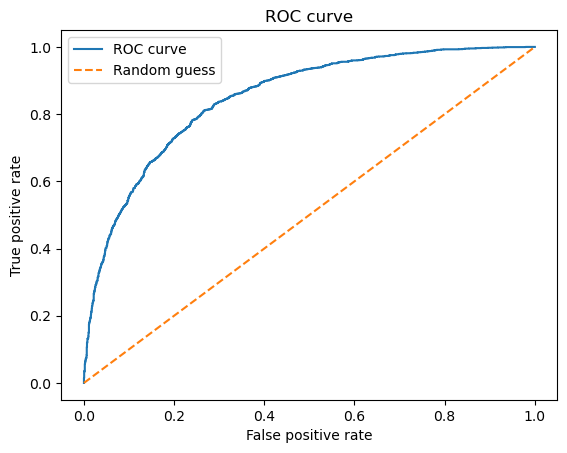

In [10]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_lr, hyperparameters_lr, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.764
Precision: 0.734
Recall: 0.806
F1 score: 0.769

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      2076
           1       0.73      0.81      0.77      1968

    accuracy                           0.76      4044
   macro avg       0.77      0.76      0.76      4044
weighted avg       0.77      0.76      0.76      4044

AUC-ROC score: 0.846
{'classifier__C': 0.6870614282613298, 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}


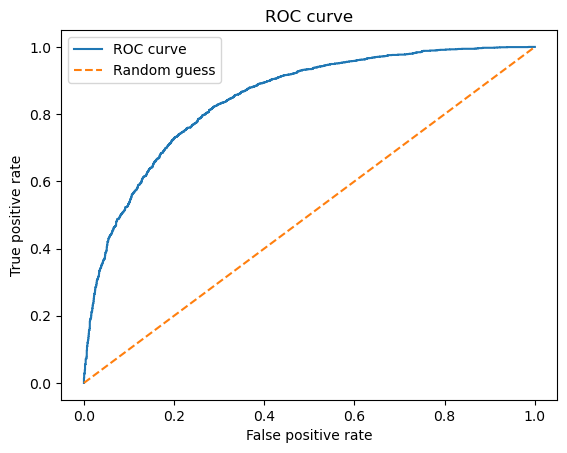

In [11]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_lr_text, hyperparameters_lr_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

KNN

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.544
Precision: 0.533
Recall: 0.496
F1 score: 0.514

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      2076
           1       0.53      0.50      0.51      1968

    accuracy                           0.54      4044
   macro avg       0.54      0.54      0.54      4044
weighted avg       0.54      0.54      0.54      4044

AUC-ROC score: 0.563
{'preprocessor__text__ngram_range': (1, 2), 'preprocessor__text__max_features': 2000, 'classifier__weights': 'uniform', 'classifier__n_neighbors': 17, 'classifier__algorithm': 'auto'}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


accuracy
    text_final   0.037 +/- 0.010
recall


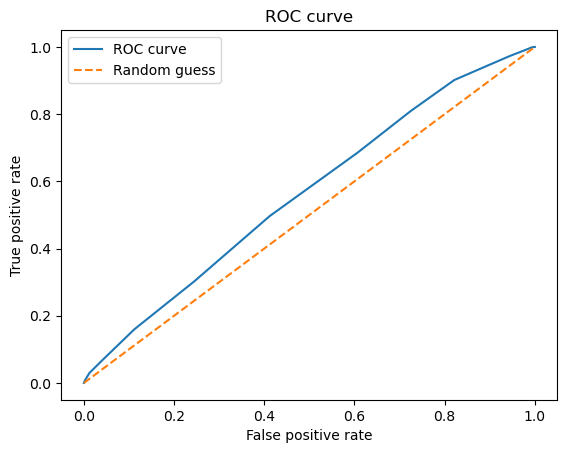

In [12]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_knn, hyperparameters_knn, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.520
Precision: 0.504
Recall: 0.745
F1 score: 0.602

Classification report:
              precision    recall  f1-score   support

           0       0.56      0.31      0.39      2076
           1       0.50      0.75      0.60      1968

    accuracy                           0.52      4044
   macro avg       0.53      0.53      0.50      4044
weighted avg       0.53      0.52      0.50      4044

AUC-ROC score: 0.545
{'preprocessor__text__ngram_range': (1, 2), 'preprocessor__text__max_features': 2000, 'classifier__weights': 'uniform', 'classifier__n_neighbors': 17, 'classifier__algorithm': 'auto'}


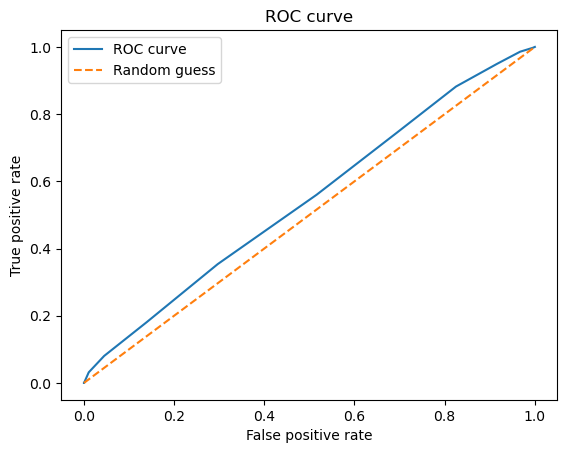

In [13]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_knn_text, hyperparameters_knn_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

SVC

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 0.712
Precision: 0.682
Recall: 0.764
F1 score: 0.721

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      2076
           1       0.68      0.76      0.72      1968

    accuracy                           0.71      4044
   macro avg       0.71      0.71      0.71      4044
weighted avg       0.72      0.71      0.71      4044

AUC-ROC score: 0.788
{'preprocessor__text__ngram_range': (1, 2), 'preprocessor__text__max_features': 500, 'classifier__kernel': 'linear', 'classifier__gamma': 'scale', 'classifier__C': 1}
accuracy
    text_final   0.215 +/- 0.005
    word_count_categories   0.005 +/- 0.002
recall
    text_final   0.216 +/- 0.006


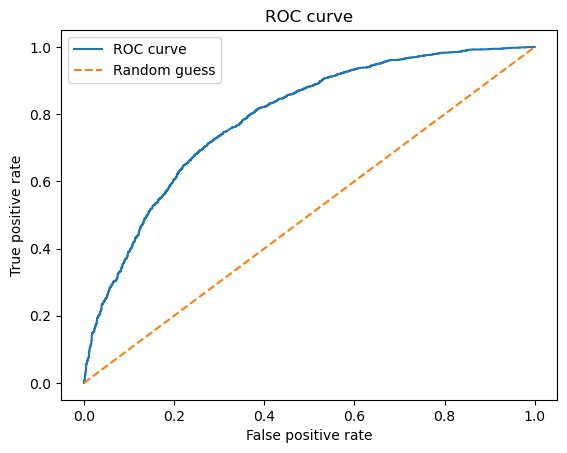

In [14]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_svc, hyperparameters_svc, cv=5, n_jobs=-1, verbose=1, n_iter=5, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.712
Precision: 0.681
Recall: 0.768
F1 score: 0.722

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      2076
           1       0.68      0.77      0.72      1968

    accuracy                           0.71      4044
   macro avg       0.72      0.71      0.71      4044
weighted avg       0.72      0.71      0.71      4044

AUC-ROC score: 0.784
{'preprocessor__text__ngram_range': (1, 2), 'preprocessor__text__max_features': 500, 'classifier__kernel': 'linear', 'classifier__gamma': 'scale', 'classifier__C': 1}


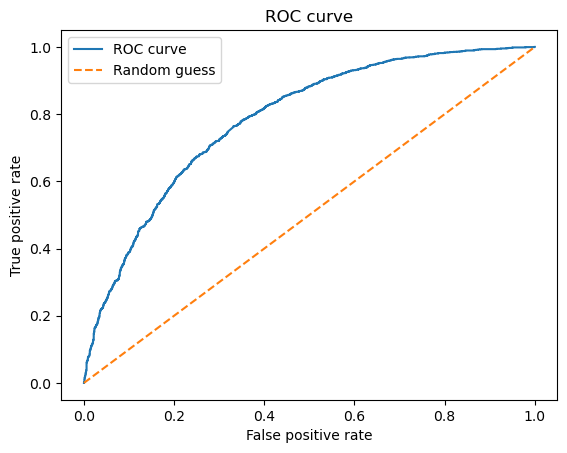

In [15]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_svc_text, hyperparameters_svc_text, cv=5, n_jobs=-1, verbose=1, n_iter=5, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Naive Bayes

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.731
Precision: 0.708
Recall: 0.763
F1 score: 0.734

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2076
           1       0.71      0.76      0.73      1968

    accuracy                           0.73      4044
   macro avg       0.73      0.73      0.73      4044
weighted avg       0.73      0.73      0.73      4044

AUC-ROC score: 0.807
{'classifier__alpha': 0.45606998421703593, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.229 +/- 0.006
recall
    text_final   0.244 +/- 0.008


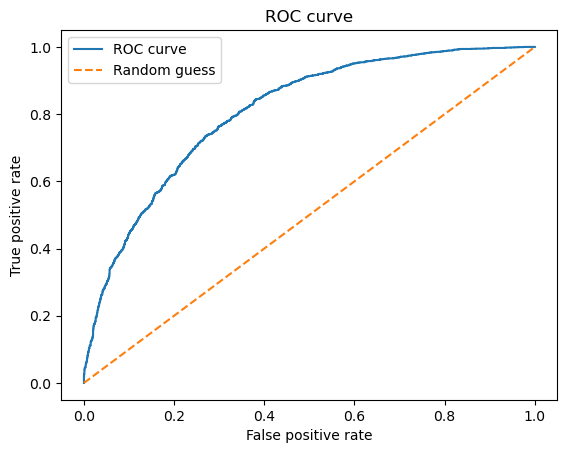

In [16]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_nb, hyperparameters_nb, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.741
Precision: 0.721
Recall: 0.762
F1 score: 0.741

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2076
           1       0.72      0.76      0.74      1968

    accuracy                           0.74      4044
   macro avg       0.74      0.74      0.74      4044
weighted avg       0.74      0.74      0.74      4044

AUC-ROC score: 0.816
{'classifier__alpha': 0.45606998421703593, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}


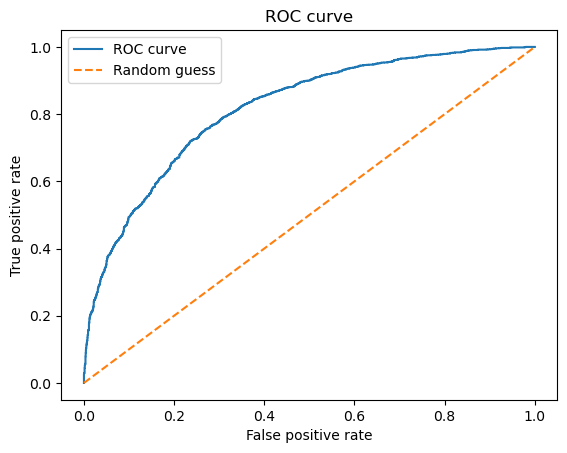

In [17]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_nb_text, hyperparameters_nb_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Decision Tree

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.631
Precision: 0.594
Recall: 0.765
F1 score: 0.668

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58      2076
           1       0.59      0.76      0.67      1968

    accuracy                           0.63      4044
   macro avg       0.64      0.63      0.63      4044
weighted avg       0.64      0.63      0.62      4044

AUC-ROC score: 0.679
{'classifier__criterion': 'entropy', 'classifier__max_depth': 14, 'classifier__max_features': 0.7272719958564209, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 8, 'classifier__splitter': 'random', 'preprocessor__text__max_features': 500, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.133 +/- 0.007
recall
    text_final   0.138 +/- 0.008


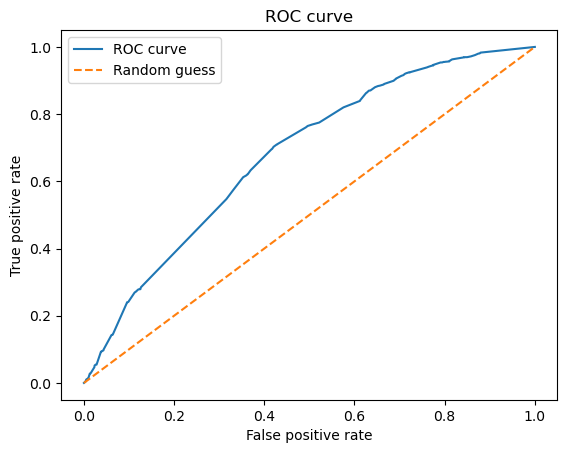

In [18]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_dtc, hyperparameters_dtc, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.630
Precision: 0.584
Recall: 0.836
F1 score: 0.688

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.43      0.55      2076
           1       0.58      0.84      0.69      1968

    accuracy                           0.63      4044
   macro avg       0.66      0.64      0.62      4044
weighted avg       0.66      0.63      0.62      4044

AUC-ROC score: 0.681
{'classifier__criterion': 'entropy', 'classifier__max_depth': 14, 'classifier__max_features': 0.7272719958564209, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 8, 'classifier__splitter': 'random', 'preprocessor__text__max_features': 500, 'preprocessor__text__ngram_range': (1, 2)}


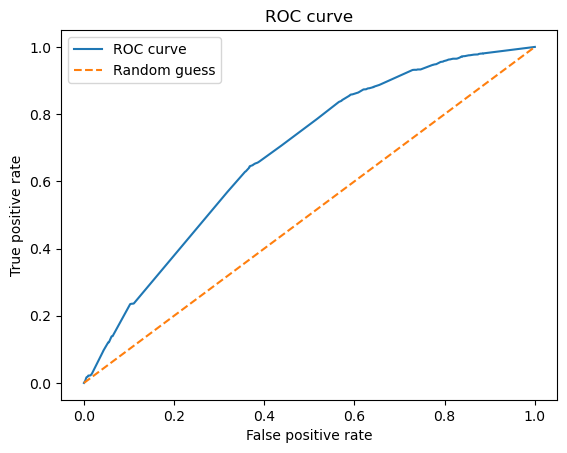

In [19]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_dtc_text, hyperparameters_dtc_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.678
Precision: 0.632
Recall: 0.811
F1 score: 0.710

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.55      0.64      2076
           1       0.63      0.81      0.71      1968

    accuracy                           0.68      4044
   macro avg       0.69      0.68      0.67      4044
weighted avg       0.70      0.68      0.67      4044

AUC-ROC score: 0.753
{'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 0.034388521115218396, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 59, 'preprocessor__text__max_features': 1000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.177 +/- 0.006
recall
    text_final   0.182 +/- 0.007


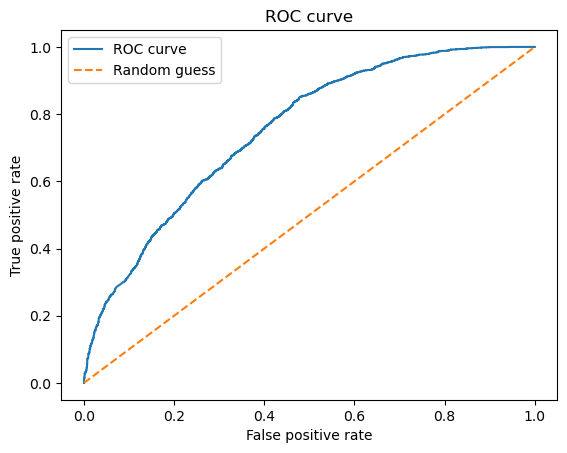

In [10]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_rfc, hyperparameters_rfc, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.673
Precision: 0.620
Recall: 0.851
F1 score: 0.717

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      2076
           1       0.62      0.85      0.72      1968

    accuracy                           0.67      4044
   macro avg       0.70      0.68      0.67      4044
weighted avg       0.70      0.67      0.66      4044

AUC-ROC score: 0.757
{'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 0.034388521115218396, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 59, 'preprocessor__text__max_features': 1000, 'preprocessor__text__ngram_range': (1, 2)}


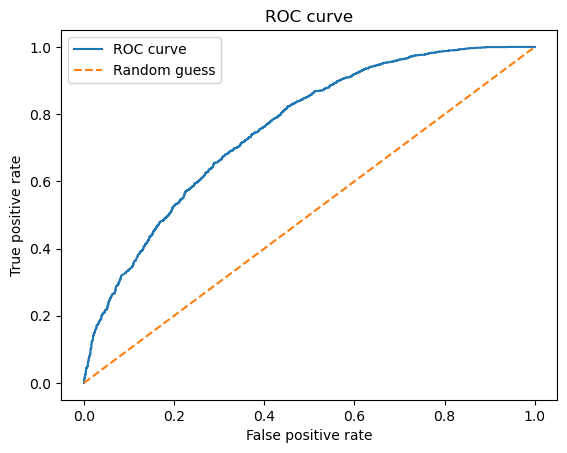

In [11]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_rfc_text, hyperparameters_rfc_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

AdaBoost

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.717
Precision: 0.674
Recall: 0.810
F1 score: 0.736

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.69      2076
           1       0.67      0.81      0.74      1968

    accuracy                           0.72      4044
   macro avg       0.73      0.72      0.72      4044
weighted avg       0.73      0.72      0.71      4044

AUC-ROC score: 0.809
{'classifier__learning_rate': 0.3105575058716044, 'classifier__n_estimators': 161, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.216 +/- 0.006
recall
    text_final   0.222 +/- 0.006


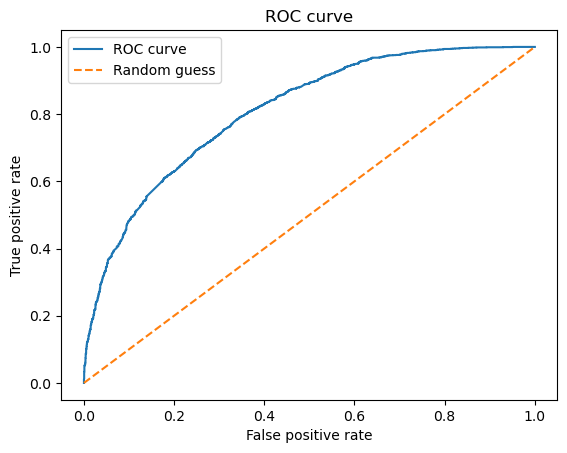

In [12]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_abc, hyperparameters_abc, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.717
Precision: 0.674
Recall: 0.810
F1 score: 0.736

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.69      2076
           1       0.67      0.81      0.74      1968

    accuracy                           0.72      4044
   macro avg       0.73      0.72      0.72      4044
weighted avg       0.73      0.72      0.71      4044

AUC-ROC score: 0.809
{'classifier__learning_rate': 0.3105575058716044, 'classifier__n_estimators': 161, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}


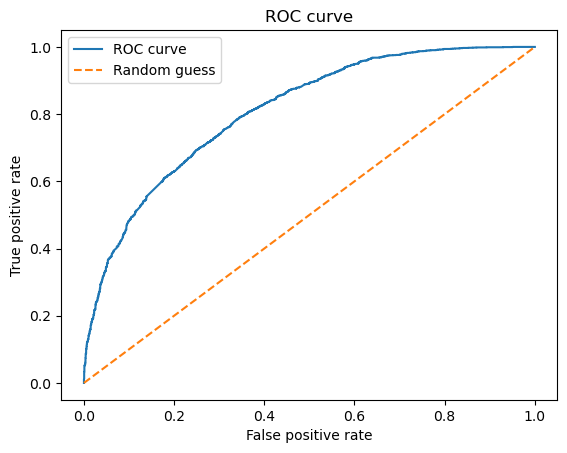

In [13]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_abc_text, hyperparameters_abc_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

XGBoost

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.742
Precision: 0.708
Recall: 0.800
F1 score: 0.751

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      2076
           1       0.71      0.80      0.75      1968

    accuracy                           0.74      4044
   macro avg       0.75      0.74      0.74      4044
weighted avg       0.75      0.74      0.74      4044

AUC-ROC score: 0.827
{'classifier__colsample_bytree': 0.749816047538945, 'classifier__learning_rate': 0.4853571532049581, 'classifier__max_depth': 4, 'classifier__n_estimators': 81, 'classifier__subsample': 0.8394633936788146, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.243 +/- 0.008
recall
    text_final   0.250 +/- 0.009


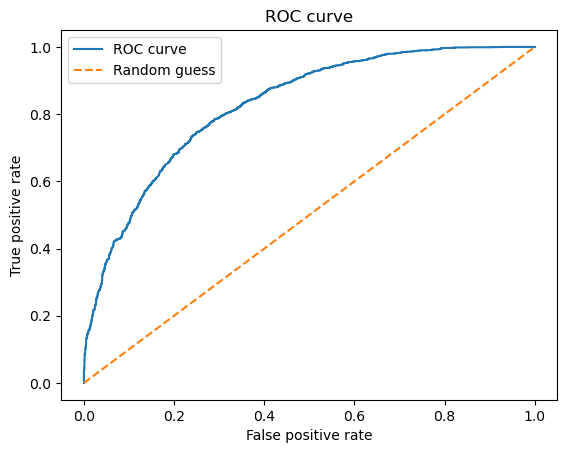

In [14]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_xgb, hyperparameters_xgb, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'category', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
     print(f"{metric}")
     result = r[metric]
     for i in result.importances_mean.argsort()[::-1]:
         if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
             print(f"    {feature_names[i]:<8}   " 
                   f"{result.importances_mean[i]:.3f}"
                   f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.734
Precision: 0.701
Recall: 0.790
F1 score: 0.743

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      2076
           1       0.70      0.79      0.74      1968

    accuracy                           0.73      4044
   macro avg       0.74      0.74      0.73      4044
weighted avg       0.74      0.73      0.73      4044

AUC-ROC score: 0.825
{'classifier__colsample_bytree': 0.749816047538945, 'classifier__learning_rate': 0.4853571532049581, 'classifier__max_depth': 4, 'classifier__n_estimators': 81, 'classifier__subsample': 0.8394633936788146, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}


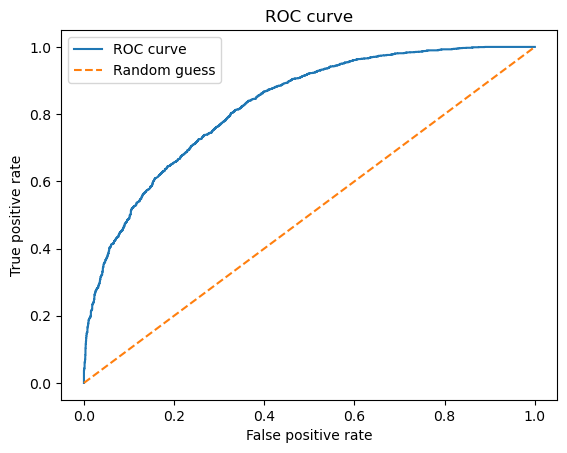

In [15]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_xgb_text, hyperparameters_xgb_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()